In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
from keras.layers import Dense, Activation,Input
from keras.models import Model
from keras.utils import np_utils

ImportError: cannot import name np_utils

In [12]:
ds = pd.read_csv('Datasets/mnist_train.csv')
data = ds.values[:15000,1:]/255.0
print data.shape

(15000, 784)


In [16]:
## Model in Keras
inp = Input(shape=(784,))
h1 = Dense(100)
a1= Activation('relu')
y=Dense(784)
ya = Activation('sigmoid')

y_out = ya(y(a1(h1(inp))))

model = Model(input=[inp],output=[y_out])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_7 (Dense)                  (None, 100)           78500       input_5[0][0]                    
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 100)           0           dense_7[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 784)           79184       activation_7[0][0]               
___________________________________________________________________________________________

In [17]:
##Intializes Random Value of Weights

model.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])

In [15]:
split = int(0.8*data.shape[0])
print split
print data.shape

12000
(15000, 784)


In [6]:
model.fit(data[:split],data[:split],batch_size=60,nb_epoch=50,verbose=2,validation_data=(data[split:],data[split:]))

Train on 12000 samples, validate on 3000 samples
Epoch 1/50
1s - loss: 0.0601 - acc: 0.0114 - val_loss: 0.0341 - val_acc: 0.0120
Epoch 2/50
1s - loss: 0.0276 - acc: 0.0107 - val_loss: 0.0224 - val_acc: 0.0090
Epoch 3/50
0s - loss: 0.0192 - acc: 0.0096 - val_loss: 0.0166 - val_acc: 0.0070
Epoch 4/50
0s - loss: 0.0146 - acc: 0.0100 - val_loss: 0.0131 - val_acc: 0.0080
Epoch 5/50
0s - loss: 0.0116 - acc: 0.0117 - val_loss: 0.0107 - val_acc: 0.0090
Epoch 6/50
0s - loss: 0.0095 - acc: 0.0109 - val_loss: 0.0089 - val_acc: 0.0107
Epoch 7/50
0s - loss: 0.0080 - acc: 0.0119 - val_loss: 0.0077 - val_acc: 0.0130
Epoch 8/50
0s - loss: 0.0069 - acc: 0.0123 - val_loss: 0.0068 - val_acc: 0.0107
Epoch 9/50
0s - loss: 0.0061 - acc: 0.0126 - val_loss: 0.0060 - val_acc: 0.0117
Epoch 10/50
1s - loss: 0.0054 - acc: 0.0125 - val_loss: 0.0054 - val_acc: 0.0137
Epoch 11/50
0s - loss: 0.0050 - acc: 0.0122 - val_loss: 0.0050 - val_acc: 0.0117
Epoch 12/50
0s - loss: 0.0046 - acc: 0.0115 - val_loss: 0.0047 - val_

In [7]:
## Encoder

enc_out = a1(h1(inp))
encoder = Model(input=[inp],output=[enc_out])

## Decoder
dec_inp = Input(shape=(100,))
dec_out = ya(y(a1(dec_inp)))
decoder = Model(input=[dec_inp],output=[dec_out])

In [8]:
data_pred = data[:1000,]
ex = encoder.predict(data_pred)
print ex.shape

dx = decoder.predict(ex)
print dx.shape




(1000, 100)
(1000, 784)


650


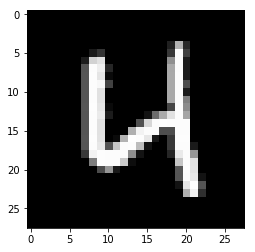

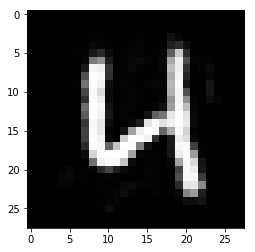

In [18]:
n = np.random.choice(1000)
print n
plt.imshow(data[n].reshape((28,28)),cmap='gray')
plt.show()

plt.imshow(dx[n].reshape((28,28)),cmap='gray')
plt.show()